(07/06/2023) Testing using neural nets to do regression. In particular, we are interested in learning:
$$
    f(v) = \mathbb{E}[\mathbf{X}^T\mathbf{K}\mathbf{Y} | V = v]
$$ where $v = v(\mathbf{X})$ is the energy of the states $\mathbf{X}$. The Monte Carlo data for $\mathbf{X}^T\mathbf{K}\mathbf{Y}$ and $v(\mathbf{X})$ are already generated. We attempt to learn this function by using an NN to minimize the MSE.

In [1]:
from PINN.PhysicsInformedROPDF import *
# Testing
import matplotlib.pyplot as plt
import torch
import numpy as np
import scipy

# set random seeds
np.random.seed(10)
torch.manual_seed(10);

In [69]:
layers = [1, 64, 64, 64, 1]
cond_exp_nn = DNN(layers)

In [76]:
# load data
v_path = "../data/LinearOscillator/OU_noise_energy.mat"
cond_exp_path = "../data/LinearOscillator/cond_exp.mat"
data1 = scipy.io.loadmat(v_path)
data2 = scipy.io.loadmat(cond_exp_path)

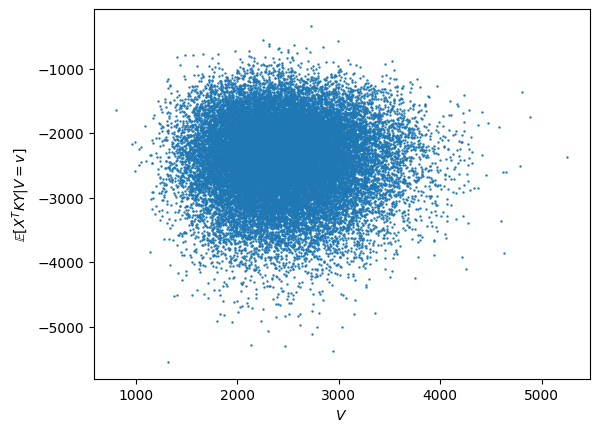

In [87]:
x = data1["v_data"]
y = data2["cond_exp_data"]
plt.figure(1);
plt.scatter(x[:, 10], y[:, 10], s=0.5);
plt.xlabel(r"$V$"); plt.ylabel(r"$\mathbb{E}[X^TKY|V=v]$");

In [88]:
# train NN
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# come back ...